### 1. Setup and Load Data

#### 1.1 Install dependencies and setup

In [67]:
import tensorflow as tf
import os

In [134]:
os.path.join('data','happy')

'data\\happy'

In [135]:
# gpus = tf.config.experimental.list_physical_devices("GPU")
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu,True)

#### 1.2 Remove dodgy images

In [136]:
import cv2
from matplotlib import pyplot as plt
# import imghdr

In [137]:
data_dir = 'data'

In [138]:
os.listdir(data_dir)

['happy', 'sad']

In [139]:
img_ext = ['JPEG', 'JPG', 'BMP', 'PNG']

In [140]:
img = cv2.imread(os.path.join(data_dir,"happy",'170404-happy-workers-feature.jpg'))
img = img.T
img = img.T

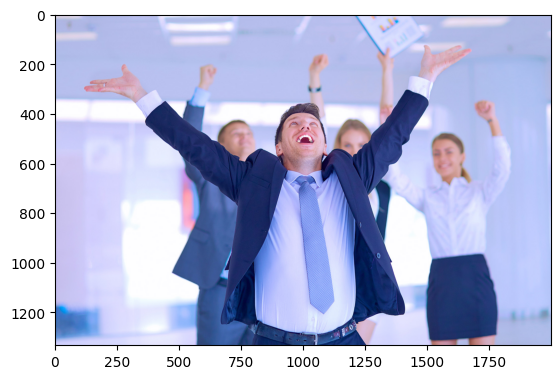

In [141]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#### 1.2.1 Testing the Pillow library since imghdr is deprecated

In [142]:
from PIL import Image
img = Image.open(os.path.join(data_dir,"sad",'1000_F_584080922_GDrrJBOpwC2AOvbDIdPfPcxEF0RrTRgk.jpg')).format
img

'JPEG'

#### 1.2.2. Cleaning the images with different extensions than what we use

In [143]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            typ = Image.open(image_path).format
            if typ not in img_ext : 
                print("Image not in the extension list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image{}".format(image_path))

Issue with imagedata\happy\.ipynb_checkpoints


#### 1.3 Load Data

In [144]:
import numpy as np
from matplotlib import pyplot as plt

In [145]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 186 files belonging to 2 classes.


In [146]:
## To iterate through dataset we made
data_iterator = data.as_numpy_iterator()

In [147]:
## To make batch of images.
batch = data_iterator.next()

In [148]:
## Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [149]:
batch[1]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

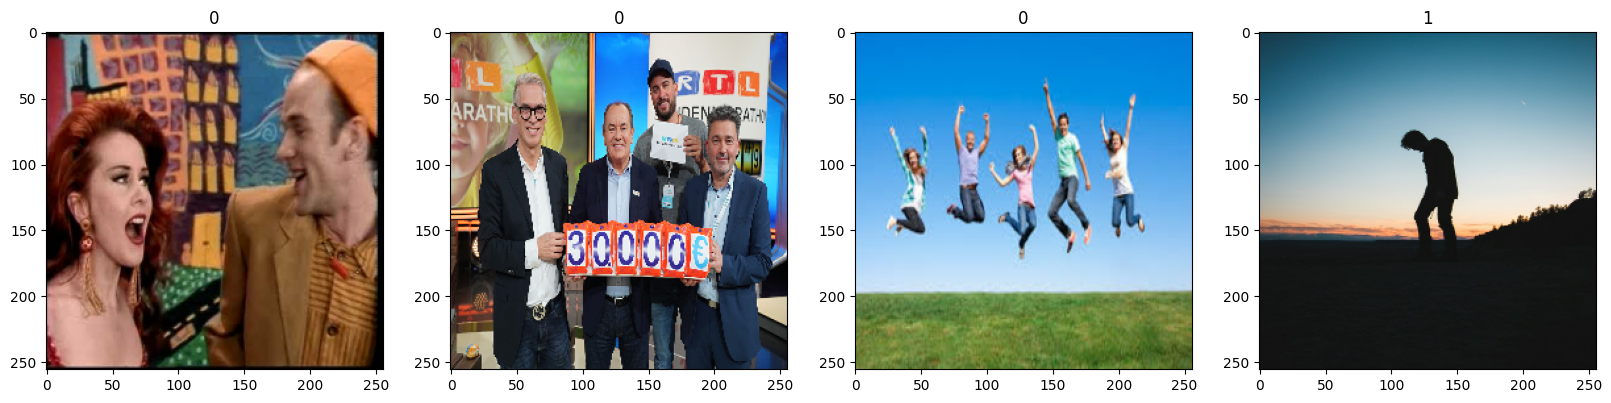

In [150]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 2. PreProcessing the data

#### 2.1 Scale the Data

In [151]:
data = data.map(lambda x,y : (x/255,y))

In [152]:
scaled_iterator = data.as_numpy_iterator()

In [153]:
scaled_iterator.next()[0].max()

1.0

In [154]:
batch = scaled_iterator.next()

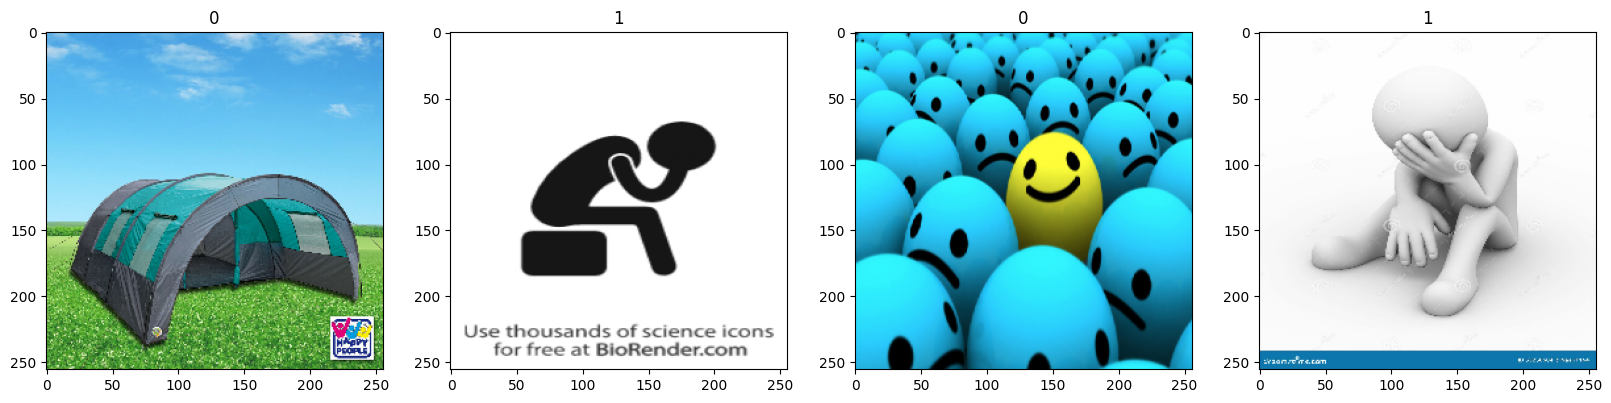

In [155]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) ## as data is scaled we will not use astype(int)
    ax[idx].title.set_text(batch[1][idx])

#### 2.2. Split the data for training and testing

In [156]:
len(data)

6

In [157]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [158]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### 3. Deep Learning Model

#### 3.1. Build Deep Learning Model

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [160]:
model = Sequential()

In [161]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [162]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [163]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#### 3.2. Train

In [169]:
logdir = 'logs'

In [170]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [171]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 483ms/step - accuracy: 0.5802 - loss: 0.7444 - val_accuracy: 0.3438 - val_loss: 0.8782
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - accuracy: 0.4375 - loss: 0.7795 - val_accuracy: 0.7812 - val_loss: 0.6841
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 461ms/step - accuracy: 0.7833 - loss: 0.6771 - val_accuracy: 0.6875 - val_loss: 0.6350
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step - accuracy: 0.6823 - loss: 0.6239 - val_accuracy: 0.9688 - val_loss: 0.4648
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 434ms/step - accuracy: 0.7927 - loss: 0.5181 - val_accuracy: 0.7500 - val_loss: 0.5039
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - accuracy: 0.7781 - loss: 0.4236 - val_accuracy: 0.8438 - val_loss: 0.4157
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 448ms/step - accuracy: 0.8865 - loss: 0.3487 - val_accuracy: 0.8125 - val_loss: 0.3534
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step - accuracy: 0.9000 - loss: 0.2704 - val_accuracy: 0.8438 - val_loss:

In [176]:
##To plot the history of model performance
#hist.history

#### 3.3. Plot Performance

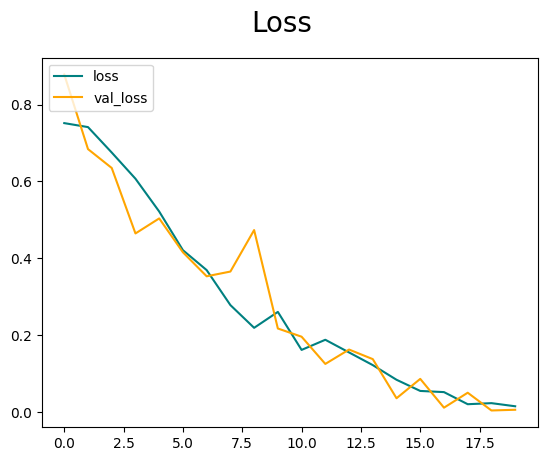

In [177]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

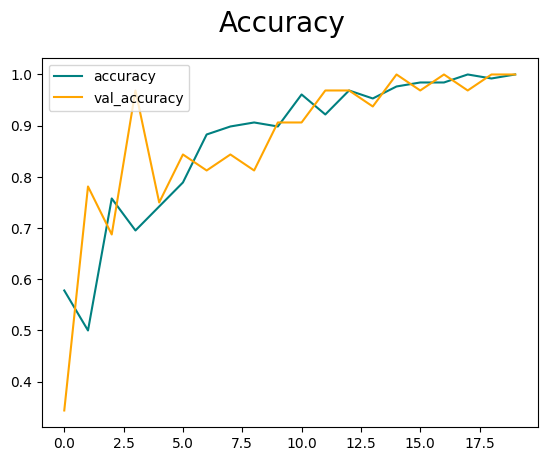

In [178]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()